![image](https://storage.googleapis.com/kaggle-datasets-images/3694126/6406287/a4d224d51d77b4e28b600d8b8c1a4ef1/dataset-cover.png?t=2023-09-03-01-21-44)

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Introduction</p></div>


This dataset compiles information on global fashion brands featured in Interbrand's Top 100 Global Brand list from 2001 to 2021. It includes data on brand name, country of origin, region of origin, industry sector, and sub-sector. For each year within this period, it provides numeric values such as brand ranking, brand equity in USD billion, and the growth rate in brand equity percentage.

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import time

rc = {
    "axes.facecolor": "#FFD9E6",
    "figure.facecolor": "#FFD9E6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Data Loading and Exploration</p></div>


### 🔘 Load the dataset using a suitable library like pandas.

In [2]:
# Read the Excel file
data = pd.read_excel('/kaggle/input/global-fashion-brands/7fg8835b4g-1/Dataset Global Fashion Brands Brand Equity Ranking Growth Rate  COO ROO 2001-2021.xlsx')

### 🔘 Explore the first few rows of the dataset to understand its structure

In [3]:
data.head().style.set_properties(**{'background-color':'blue','color':'white','border-color':'#8338EC'})

,BrandName,BrandOriginCountry,BrandOriginRegion,BrandSector,BrandSubSector,Rank2001,Rank2002,Rank2003,Rank2004,Rank2005,Rank2006,Rank2007,Rank2008,Rank2009,Rank2010,Rank2011,Rank2012,Rank2013,Rank2014,Rank2015,Rank2016,Rank2017,Rank2018,Rank2019,Rank2020,Rank2021,Equity2001,Equity2002,Equity2003,Equity2004,Equity2005,Equity2006,Equity2007,Equity2008,Equity2009,Equity2010,Equity2011,Equity2012,Equity2013,Equity2014,Equity2015,Equity2016,Equity2017,Equity2018,Equity2019,Equity2020,Equity2021,GrowthRate2001,GrowthRate2002,GrowthRate2003,GrowthRate2004,GrowthRate2005,GrowthRate2006,GrowthRate2007,GrowthRate2008,GrowthRate2009,GrowthRate2010,GrowthRate2011,GrowthRate2012,GrowthRate2013,GrowthRate2014,GrowthRate2015,GrowthRate2016,GrowthRate2017,GrowthRate2018,GrowthRate2019,GrowthRate2020,GrowthRate2021
0,Louis Vuitton,France,Europe,Fashion,Luxury,38.000000,41.000000,45.000000,44.000000,18.000000,17.000000,17.000000,16.000000,16.000000,16.000000,18.000000,17.000000,17.000000,19.000000,20.000000,19.000000,19.000000,18.000000,17.000000,17.000000,13.000000,7053.000000,7054.000000,6708.000000,6602.000000,16077.000000,17606.000000,20321.000000,21602.000000,21120.000000,21860.000000,23172.000000,23577.000000,24893.000000,22552.000000,22250.000000,23998.000000,22919.000000,28152.000000,32223.000000,31720.000000,36766.000000,nan,0.014178,-4.905018,-1.580203,143.517116,9.510481,15.420879,6.303824,-2.231275,3.503788,6.001830,1.747799,5.581711,-9.404250,-1.339127,7.856180,-4.496208,22.832584,14.460784,-1.560997,15.907945
1,Chanel,France,Europe,Fashion,Luxury,61.000000,64.000000,61.000000,64.000000,65.000000,61.000000,58.000000,60.000000,59.000000,nan,nan,nan,nan,nan,nan,nan,nan,23.000000,22.000000,21.000000,22.000000,4265.000000,4272.000000,4315.000000,4416.000000,4778.000000,5156.000000,5830.000000,6355.000000,6040.000000,nan,nan,nan,nan,nan,nan,nan,nan,20005.000000,22134.000000,21203.000000,22109.000000,nan,0.164127,1.006554,2.340672,8.197464,7.911260,13.072149,9.005146,-4.956727,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.642339,-4.206199,4.272980
2,Hermès,France,Europe,Fashion,Luxury,nan,nan,73.000000,79.000000,82.000000,81.000000,73.000000,76.000000,70.000000,69.000000,66.000000,63.000000,54.000000,46.000000,41.000000,34.000000,32.000000,32.000000,28.000000,28.000000,23.000000,nan,nan,3416.000000,3376.000000,3540.000000,3854.000000,4255.000000,4575.000000,4598.000000,4782.000000,5365.000000,6182.000000,7616.000000,8977.000000,10944.000000,12833.000000,14210.000000,16372.000000,17920.000000,17961.000000,21600.000000,nan,nan,nan,-1.170960,4.857820,8.870056,10.404774,7.520564,0.502732,4.001740,12.191552,15.228332,23.196377,17.870273,21.911552,17.260599,10.730149,15.214638,9.455167,0.228795,20.260565
3,L’Oréal,France,Europe,Fashion,Cosmetics,nan,54.000000,47.000000,49.000000,52.000000,53.000000,51.000000,51.000000,44.000000,45.000000,40.000000,42.000000,40.000000,43.000000,43.000000,45.000000,45.000000,48.000000,51.000000,43.000000,53.000000,nan,5079.000000,5600.000000,5902.000000,6005.000000,6392.000000,7045.000000,7508.000000,7748.000000,7981.000000,8699.000000,8821.000000,9874.000000,10162.000000,10798.000000,10930.000000,10674.000000,11102.000000,11589.000000,12553.000000,12501.000000,nan,nan,10.257925,5.392857,1.745171,6.444629,10.215895,6.572037,3.196590,3.007228,8.996366,1.402460,11.937422,2.916751,6.258611,1.222449,-2.342177,4.009743,4.386597,8.318233,-0.414244
4,Dior,France,Europe,Fashion,Luxury,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,89.000000,95.000000,91.000000,82.000000,83.000000,77.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4909.000000,4587.000000,5223.000000,6045.000000,5988.000000,7024.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-6.559381,13.865271,15.738082,-0.942928,17.301269


### 🔘 Check for null values. If any are found, remove them

In [4]:
data_num_rows, data_num_cols = data.shape
print(f'Dataset \nNumber of rows : {data_num_rows}\nNumber of columns: {data_num_cols}')

Dataset 
Number of rows : 30
Number of columns: 68


### 🔘 Basic info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 68 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BrandName           30 non-null     object 
 1   BrandOriginCountry  30 non-null     object 
 2   BrandOriginRegion   30 non-null     object 
 3   BrandSector         30 non-null     object 
 4   BrandSubSector      30 non-null     object 
 5   Rank2001            16 non-null     float64
 6   Rank2002            15 non-null     float64
 7   Rank2003            15 non-null     float64
 8   Rank2004            18 non-null     float64
 9   Rank2005            18 non-null     float64
 10  Rank2006            19 non-null     float64
 11  Rank2007            17 non-null     float64
 12  Rank2008            17 non-null     float64
 13  Rank2009            21 non-null     float64
 14  Rank2010            16 non-null     float64
 15  Rank2011            15 non-null     float64
 16  Rank2012  

In [6]:
data.columns

Index(['BrandName', 'BrandOriginCountry', 'BrandOriginRegion', 'BrandSector',
       'BrandSubSector', 'Rank2001', 'Rank2002', 'Rank2003', 'Rank2004',
       'Rank2005', 'Rank2006', 'Rank2007', 'Rank2008', 'Rank2009', 'Rank2010',
       'Rank2011', 'Rank2012', 'Rank2013', 'Rank2014', 'Rank2015', 'Rank2016',
       'Rank2017', 'Rank2018', 'Rank2019', 'Rank2020', 'Rank2021',
       'Equity2001', 'Equity2002', 'Equity2003', 'Equity2004', 'Equity2005',
       'Equity2006', 'Equity2007', 'Equity2008', 'Equity2009', 'Equity2010',
       'Equity2011', 'Equity2012', 'Equity2013', 'Equity2014', 'Equity2015',
       'Equity2016', 'Equity2017', 'Equity2018', 'Equity2019', 'Equity2020',
       'Equity2021', 'GrowthRate2001', 'GrowthRate2002', 'GrowthRate2003',
       'GrowthRate2004', 'GrowthRate2005', 'GrowthRate2006', 'GrowthRate2007',
       'GrowthRate2008', 'GrowthRate2009', 'GrowthRate2010', 'GrowthRate2011',
       'GrowthRate2012', 'GrowthRate2013', 'GrowthRate2014', 'GrowthRate2015',
    

### 🔘 Count null/nan values

In [7]:
data.isna().sum()

BrandName              0
BrandOriginCountry     0
BrandOriginRegion      0
BrandSector            0
BrandSubSector         0
                      ..
GrowthRate2017        16
GrowthRate2018        17
GrowthRate2019        16
GrowthRate2020        16
GrowthRate2021        16
Length: 68, dtype: int64

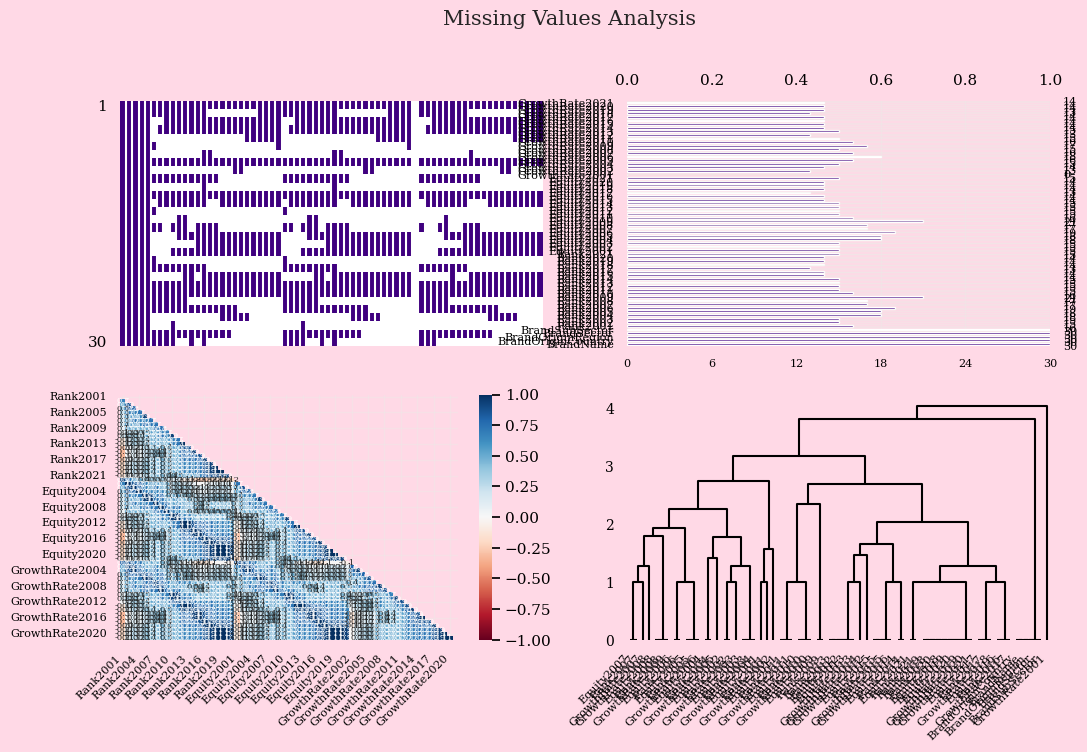

In [8]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(data,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(data, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(data,fontsize=8,ax=axs[2]);
msno.dendrogram(data,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15);

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Data Cleaning</p></div>


### 🔘 Handle missing values appropriately (e.g., replace with zeros or mean values)

In [9]:
# Checking the null values in the data set
data.isna().sum()/len(data)*100

BrandName              0.000000
BrandOriginCountry     0.000000
BrandOriginRegion      0.000000
BrandSector            0.000000
BrandSubSector         0.000000
                        ...    
GrowthRate2017        53.333333
GrowthRate2018        56.666667
GrowthRate2019        53.333333
GrowthRate2020        53.333333
GrowthRate2021        53.333333
Length: 68, dtype: float64

In [10]:
# Replacing NaN with zeros
data_filled = data.fillna(0)

# Checking the null values in the data set after filling NaN with zeros
missing_percent = data_filled.isna().sum() / len(data_filled) * 100

print("Percentage of missing values after replacing NaN with zeros:")
print(missing_percent)

Percentage of missing values after replacing NaN with zeros:
BrandName             0.0
BrandOriginCountry    0.0
BrandOriginRegion     0.0
BrandSector           0.0
BrandSubSector        0.0
                     ... 
GrowthRate2017        0.0
GrowthRate2018        0.0
GrowthRate2019        0.0
GrowthRate2020        0.0
GrowthRate2021        0.0
Length: 68, dtype: float64


In [11]:
#Checking the Percentage of the null values in the dataset
null_values=data.isna().sum()
total_missing_values=null_values.sum()
percentage_missing_values=(total_missing_values)*100
print(f'The data set contains {percentage_missing_values} of values')


The data set contains 93700 of values


### 🔘 Inspect for duplicate values and remove them if present.

In [12]:
# Checking the duplicate values in the dataset
duplicate=data.duplicated().sum()
print(f'There are {duplicate} values in the data set; we will remove them.')

There are 0 values in the data set; we will remove them.


# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Data Preparation</p></div>


### 🔘 Generate statistics about the data using the `describe` function.

In [13]:
data.describe().style.background_gradient(cmap='tab20c')

,Rank2001,Rank2002,Rank2003,Rank2004,Rank2005,Rank2006,Rank2007,Rank2008,Rank2009,Rank2010,Rank2011,Rank2012,Rank2013,Rank2014,Rank2015,Rank2016,Rank2017,Rank2018,Rank2019,Rank2020,Rank2021,Equity2001,Equity2002,Equity2003,Equity2004,Equity2005,Equity2006,Equity2007,Equity2008,Equity2009,Equity2010,Equity2011,Equity2012,Equity2013,Equity2014,Equity2015,Equity2016,Equity2017,Equity2018,Equity2019,Equity2020,Equity2021,GrowthRate2001,GrowthRate2002,GrowthRate2003,GrowthRate2004,GrowthRate2005,GrowthRate2006,GrowthRate2007,GrowthRate2008,GrowthRate2009,GrowthRate2010,GrowthRate2011,GrowthRate2012,GrowthRate2013,GrowthRate2014,GrowthRate2015,GrowthRate2016,GrowthRate2017,GrowthRate2018,GrowthRate2019,GrowthRate2020,GrowthRate2021
count,16.000000,15.000000,15.000000,18.000000,18.000000,19.000000,17.000000,17.000000,21.000000,16.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000,13.000000,14.000000,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,18.000000,18.000000,19.000000,17.000000,17.000000,21.000000,16.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000,13.000000,14.000000,14.000000,14.000000,15.000000,0.000000,13.000000,14.000000,15.000000,16.000000,18.000000,16.000000,15.000000,17.000000,16.000000,15.000000,13.000000,15.000000,14.000000,14.000000,14.000000,14.000000,13.000000,14.000000,14.000000,14.000000
mean,69.687500,66.533333,64.066667,71.611111,70.055556,72.210526,67.647059,64.117647,66.761905,63.062500,58.666667,58.133333,56.266667,55.866667,52.571429,54.500000,52.923077,50.857143,50.785714,51.714286,55.000000,3943.600000,4235.666667,4441.266667,4232.777778,5125.611111,5218.736842,6045.882353,7021.529412,6324.380952,7292.250000,8087.266667,8539.800000,9490.200000,10049.200000,11016.571429,11634.142857,12342.230769,13736.785714,14804.357143,14442.285714,15273.000000,nan,-0.244105,2.126346,1.904276,15.545904,4.859240,10.008872,5.859061,-0.410303,3.600876,8.621725,7.046957,12.417545,7.288724,4.256676,-4.642064,-6.993414,7.437651,6.873396,-3.557753,9.838879
std,23.145104,20.635845,19.196230,21.633685,24.235298,24.336938,23.181192,24.407689,25.492950,27.360479,26.089589,26.150298,26.388490,26.221220,25.424744,27.894720,29.007073,29.516246,31.083457,31.044456,31.699482,2402.939117,1970.690440,1890.236926,2008.285501,3439.404756,3636.274266,4287.726290,4817.934530,4712.377229,5412.052433,5692.850422,5708.153494,6070.027315,6228.778270,6770.608150,7496.366123,7614.168691,8299.377244,9223.247931,9473.945344,11452.365819,nan,6.742237,4.677639,5.672002,35.635035,7.577125,8.189030,7.794137,6.773773,2.207946,5.261020,8.373624,9.903965,7.411221,9.807164,29.378867,28.236681,12.662341,8.127016,6.533668,9.205279
min,31.000000,35.000000,33.000000,31.000000,18.000000,17.000000,17.000000,16.000000,16.000000,16.000000,18.000000,17.000000,17.000000,19.000000,17.000000,18.000000,18.000000,17.000000,16.000000,15.000000,11.000000,1002.000000,1509.000000,2048.000000,2147.000000,2576.000000,2689.000000,3046.000000,3401.000000,3094.000000,3110.000000,3732.000000,3731.000000,3920.000000,4122.000000,4270.000000,4092.000000,4587.000000,4812.000000,4781.000000,4495.000000,4628.000000,nan,-15.321290,-4.905018,-9.672529,-10.876133,-21.708359,-14.572943,-20.507207,-9.983934,0.484653,1.994446,-7.648515,-10.502815,-9.404250,-14.472797,-100.000000,-100.000000,-17.873877,-5.441333,-14.297950,-9.144126
25%,57.500000,53.000000,50.000000,58.250000,53.750000,57.000000,58.000000,51.000000,50.000000,44.750000,39.500000,37.500000,37.000000,38.500000,32.750000,28.750000,24.000000,26.250000,28.250000,29.000000,28.000000,1846.000000,2971.500000,3357.000000,2662.750000,2832.500000,2874.500000,3852.000000,4236.000000,3530.000000,3904.250000,4269.000000,4746.500000,5314.500000,5765.000000,6243.000000,5568.250000,5394.000000,6143.000000,6581.750000,6364.500000,6254.000000,nan,-0.405296,-0.339040,0.054324,3.679769,4.223602,8.113333,5.938715,-6.324447,2.088802,5.495048,1.402460,6.522594,3.475829,-0.237993,-8.686266,-6.512141,1.3117

In [14]:
data.describe(include=['object'])

,BrandName,BrandOriginCountry,BrandOriginRegion,BrandSector,BrandSubSector
count,30,30,30,30,30
unique,30,8,2,1,4
top,Louis Vuitton,U.S.A.,Europe,Fashion,Luxury
freq,1,8,22,30,14


# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Data Analysis and Visualization</p></div>


# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:80%;letter-spacing:0.5px;margin:0"><b> </b>Two multi-classification tasks with the following target classes:</p></div>


# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>1. </b> Brand Sector</p></div>

### 🔘  Fashion
### 🔘  Cosmetics



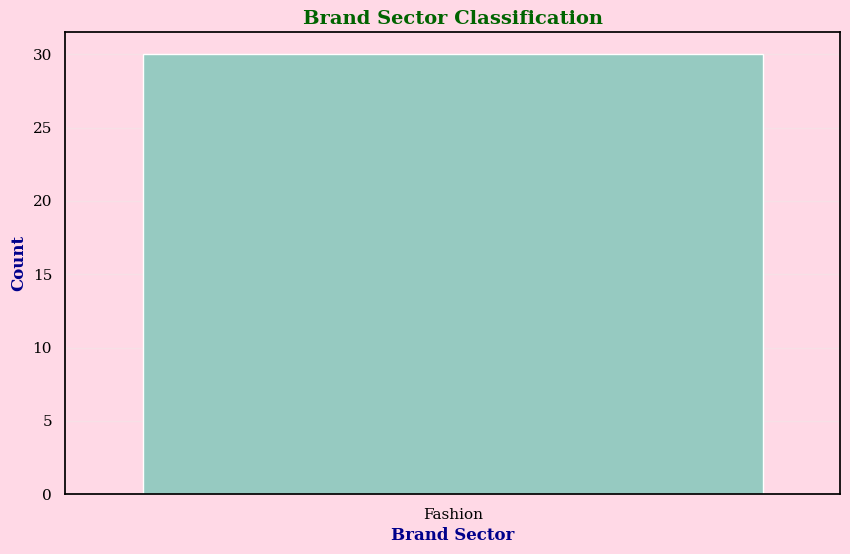

Brand Sector Value Counts:
BrandSector
Fashion    30
Name: count, dtype: int64



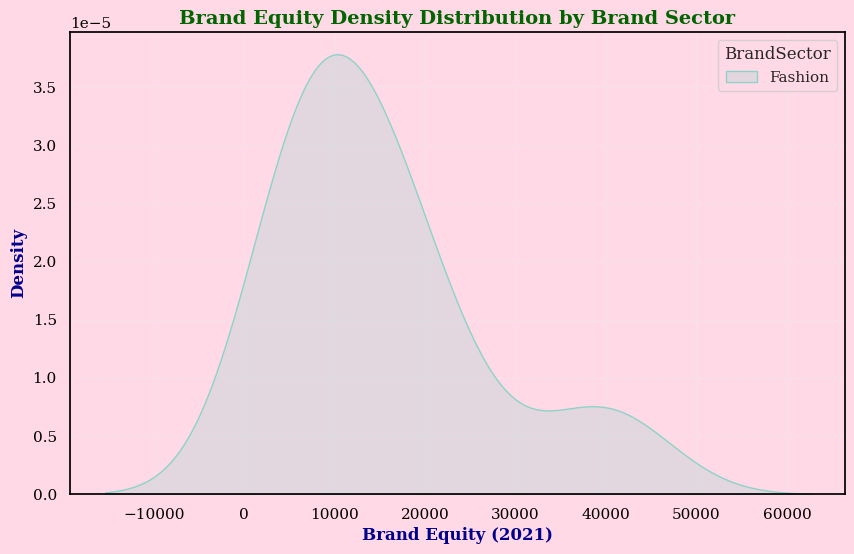

In [15]:
# Create a Brand Sector classification
#sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="BrandSector", data=data, palette="Set3")
plt.title("Brand Sector Classification", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel("Brand Sector", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Count", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.show()

# Print the value counts for Brand Sector
brand_sector_counts = data["BrandSector"].value_counts()
print("Brand Sector Value Counts:")
print(brand_sector_counts)
print()

# Create density distribution for Brand Sector based on "Equity2021"
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x="Equity2021", hue="BrandSector", palette="Set3", fill=True)
plt.title("Brand Equity Density Distribution by Brand Sector", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel("Brand Equity (2021)", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Density", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Brand Equity Density Distribution by Brand Sector.png')
plt.show()

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>2. </b>Brand Subsector</p></div>

 

### 🔘 Luxury
### 🔘 Cosmetics


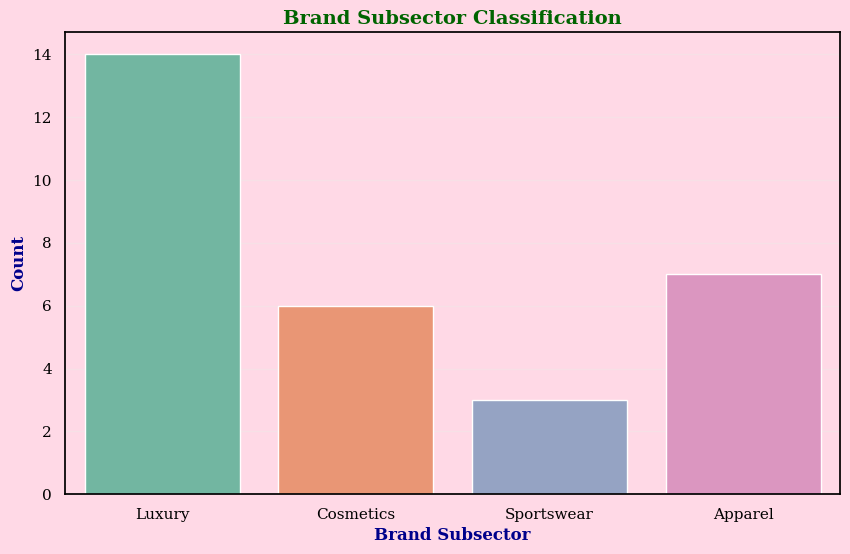

Brand Subsector Value Counts:
BrandSubSector
Luxury        14
Apparel        7
Cosmetics      6
Sportswear     3
Name: count, dtype: int64



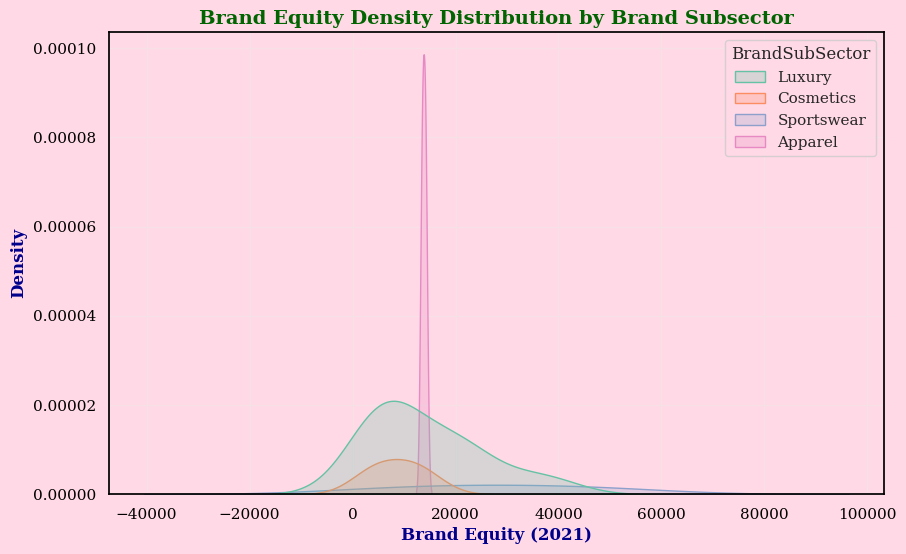

In [16]:
# Create a Brand Subsector classification
plt.figure(figsize=(10, 6))
sns.countplot(x="BrandSubSector", data=data, palette="Set2")
plt.title("Brand Subsector Classification", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel("Brand Subsector", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Count", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.show()

# Print the value counts for Brand Subsector
brand_subsector_counts = data["BrandSubSector"].value_counts()
print("Brand Subsector Value Counts:")
print(brand_subsector_counts)
print()

# Create density distribution for Brand Subsector based on "Equity2021"
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x="Equity2021", hue="BrandSubSector", palette="Set2", fill=True)
plt.title("Brand Equity Density Distribution by Brand Subsector", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel("Brand Equity (2021)", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Density", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Brand Equity Density Distribution by Brand Subsector.png')
plt.show()

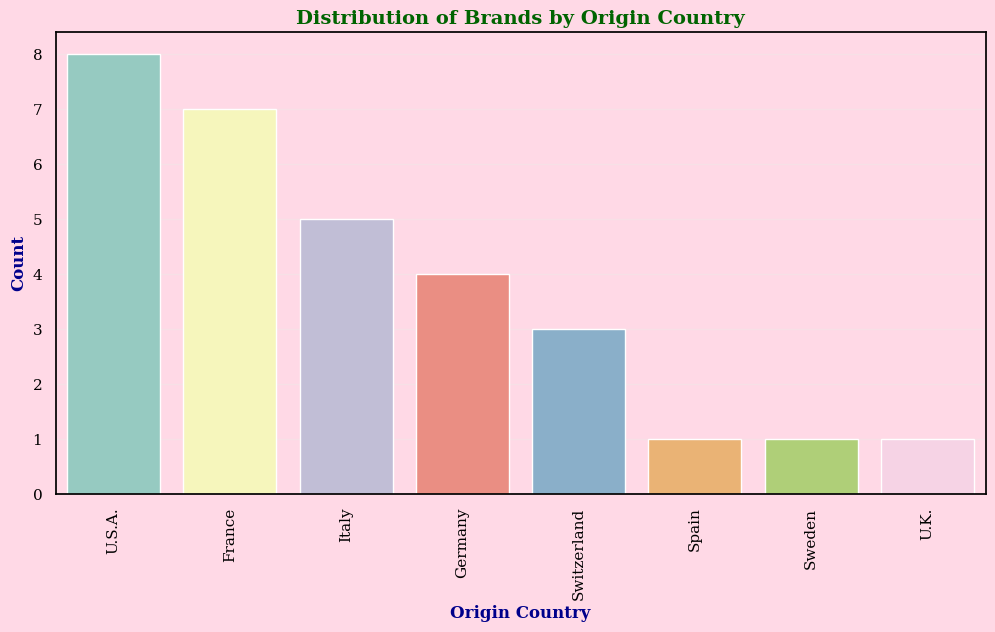

In [17]:
# Create a bar plot to show the distribution of brands by origin country
plt.figure(figsize=(12, 6))
sns.countplot(x="BrandOriginCountry", data=data, palette="Set3", order=data["BrandOriginCountry"].value_counts().index)
plt.title("Distribution of Brands by Origin Country", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel("Origin Country", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Count", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=90)
plt.savefig('Distribution of Brands by Origin Country.png')
plt.show()

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:80%;letter-spacing:0.5px;margin:0"><b> </b>Brand Sector/Subsector Trends Over Time</p></div>



#### 🔘  The distribution of brands in different sectors and subsectors has evolved over the years (from 2001 to 2021).
#### 🔘 To visualize these trends and see if there are any shifts or patterns.

Brand Sector Value Counts (Year 2001):
BrandSector
Fashion    30
Name: count, dtype: int64


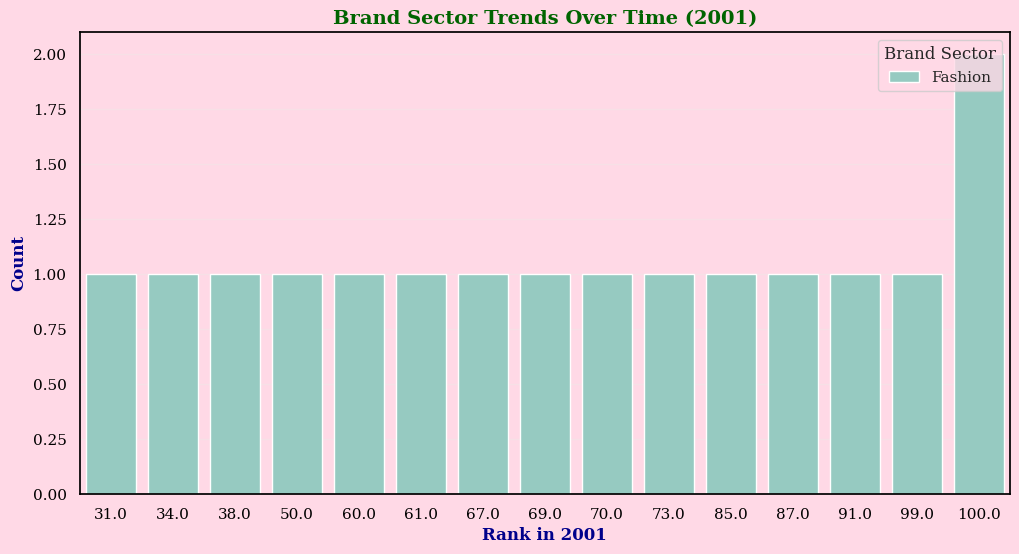

In [18]:
# Define the year you want to analyze (e.g., 2001)
year_to_analyze = "Rank2001"  

# To show sector/subsector trends over time (using Rank2001 year)
plt.figure(figsize=(12, 6))
sns.countplot(x=year_to_analyze, hue="BrandSector", data=data, palette="Set3")
plt.title(f"Brand Sector Trends Over Time ({year_to_analyze[-4:]})", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel(f"Rank in {year_to_analyze[-4:]}", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Count", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend(title="Brand Sector", loc="upper right")
plt.savefig('Brand Sector Trends Over Time.png')

# Print the value counts for each sector
sector_counts = data["BrandSector"].value_counts()
print(f"Brand Sector Value Counts (Year {year_to_analyze[-4:]}):")
print(sector_counts)
plt.show()

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Brand Equity Analysis</p></div>

#### 🔘 Compare the brand equity of brands within the same sector or subsector.
#### 🔘 Calculate summary statistics (mean, median, etc.) of brand equity for each sector or subsector.
#### 🔘 Visualize brand equity distributions using box plots or violin plots.

Mean Brand Equity by Sector/Subsector (2021):
  BrandSector BrandSubSector    Equity2021
0     Fashion        Apparel  13818.000000
1     Fashion      Cosmetics   8564.500000
2     Fashion         Luxury  14267.888889
3     Fashion     Sportswear  27959.500000


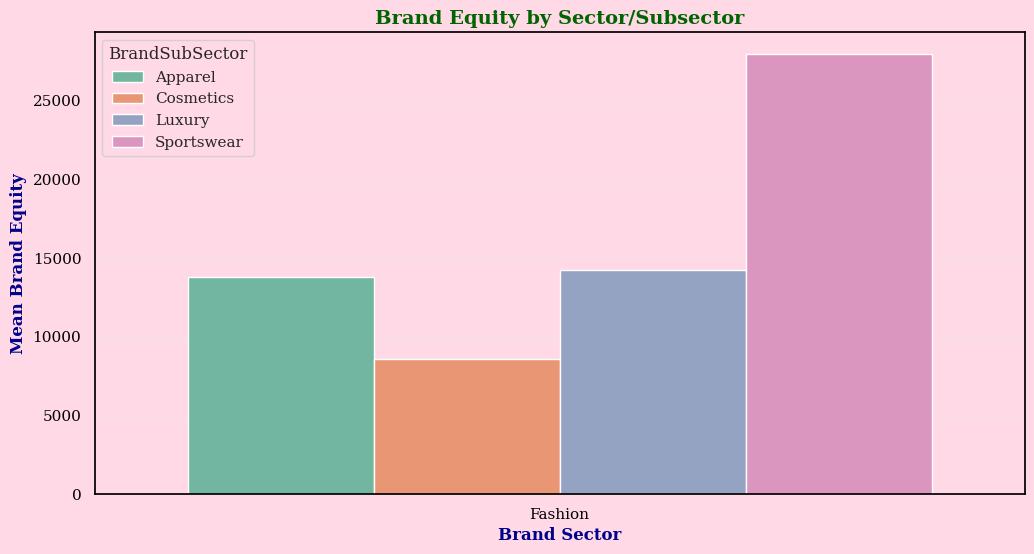

In [19]:
# Calculate mean brand equity for each sector/subsector
equity_mean = data.groupby(["BrandSector", "BrandSubSector"])["Equity2021"].mean().reset_index()

# Print the mean brand equity for each sector/subsector
print("Mean Brand Equity by Sector/Subsector (2021):")
print(equity_mean)

# To visualize brand equity by sector/subsector
plt.figure(figsize=(12, 6))
sns.barplot(x="BrandSector", y="Equity2021", hue="BrandSubSector", data=equity_mean, palette="Set2")
plt.title("Brand Equity by Sector/Subsector", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel("Brand Sector", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Mean Brand Equity", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.show()


# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Brand Ranking Analysis</p></div>

#### 🔘 Analyze how the ranking of brands has changed over time within each sector or subsector.
#### 🔘 Identify the top-performing brands within each category.
#### 🔘 To visualize brand ranking trends.

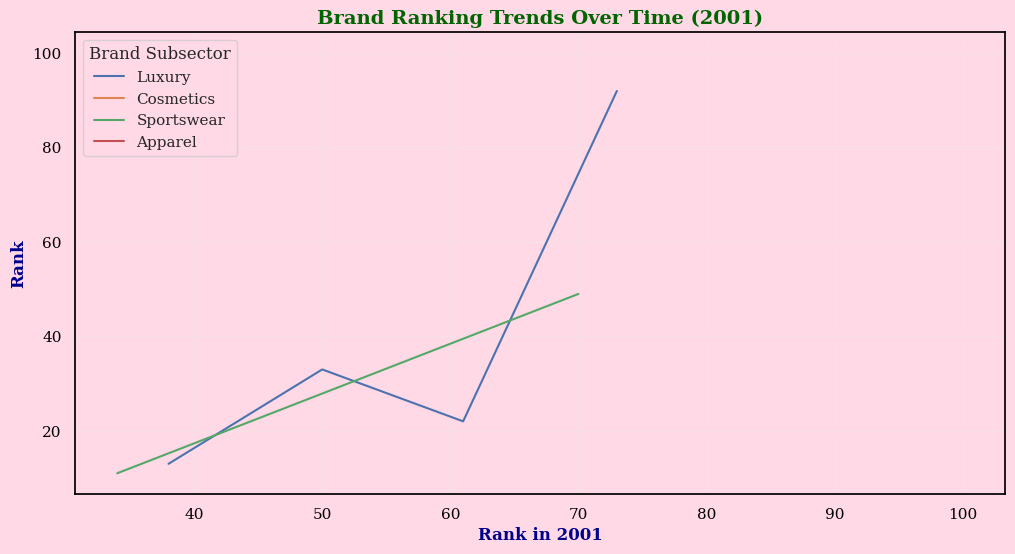

In [20]:
# Define the year you want to analyze (e.g., 2001)
year_to_analyze = "Rank2001" 

# To show brand ranking trends over time (using Rank2001 year)
plt.figure(figsize=(12, 6))
for subsector in data["BrandSubSector"].unique():
    subsector_data = data[data["BrandSubSector"] == subsector]
    sns.lineplot(x=year_to_analyze, y="Rank2021", data=subsector_data, label=subsector)
plt.title(f"Brand Ranking Trends Over Time ({year_to_analyze[-4:]})", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel(f"Rank in {year_to_analyze[-4:]}", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Rank", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend(title="Brand Subsector")
plt.savefig('Brand Ranking Trends Over Time.png')
plt.show()

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Growth Rate Analysis</p></div>

#### 🔘 Examine the growth rates of brands within different sectors or subsectors.
#### 🔘 Identify brands with the highest and lowest growth rates.
#### 🔘 Visualize growth rate distributions.

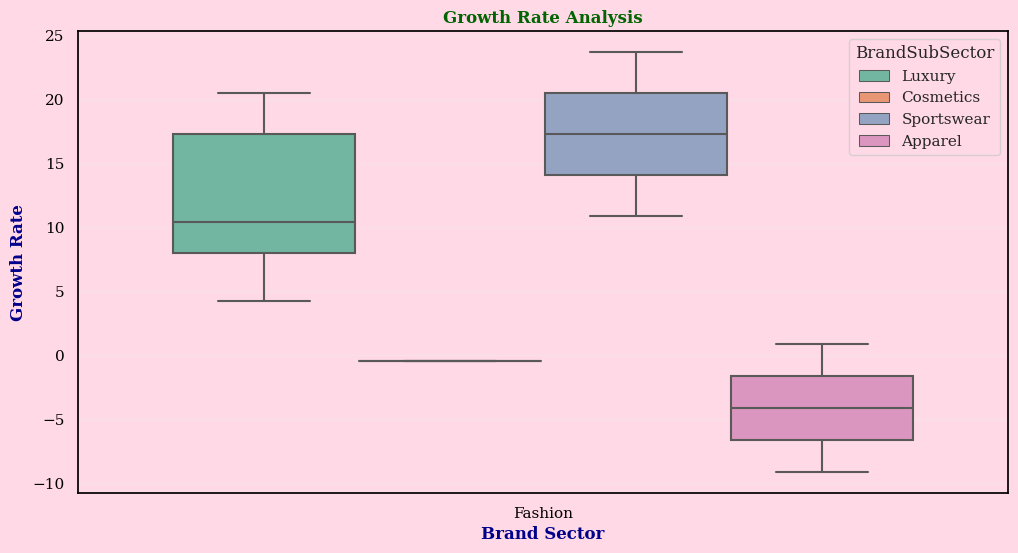

Summary Statistics for Growth Rate by Sector/Subsector (2021):
                            count       mean       std        min        25%  \
BrandSector BrandSubSector                                                     
Fashion     Apparel           2.0  -4.125889  7.096858  -9.144126  -6.635008   
            Cosmetics         1.0  -0.414244       NaN  -0.414244  -0.414244   
            Luxury            9.0  12.427618  6.149870   4.272980   8.026617   
            Sportswear        2.0  17.280884  9.078182  10.861640  14.071262   

                                  50%        75%        max  
BrandSector BrandSubSector                                   
Fashion     Apparel         -4.125889  -1.616771   0.892347  
            Cosmetics       -0.414244  -0.414244  -0.414244  
            Luxury          10.430930  17.301269  20.489433  
            Sportswear      17.280884  20.490506  23.700128  


In [21]:
# To visualize growth rate distributions by sector/subsector
plt.figure(figsize=(12, 6))
sns.boxplot(x="BrandSector", y="GrowthRate2021", hue="BrandSubSector", data=data, palette="Set2")
plt.title("Growth Rate Analysis", fontsize = 12, fontweight = 'bold', color = 'darkgreen')
plt.xlabel("Brand Sector", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Growth Rate", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Growth Rate Analysis.png')
plt.show()

# Print summary statistics for growth rate by sector/subsector
summary_stats = data.groupby(["BrandSector", "BrandSubSector"])["GrowthRate2021"].describe()
print("Summary Statistics for Growth Rate by Sector/Subsector (2021):")
print(summary_stats)

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Geographical Analysis</p></div>


#### 🔘 Explore the geographical distribution of brands based on their origin country or region.
#### 🔘 To visualize which countries or regions have the highest number of brands.

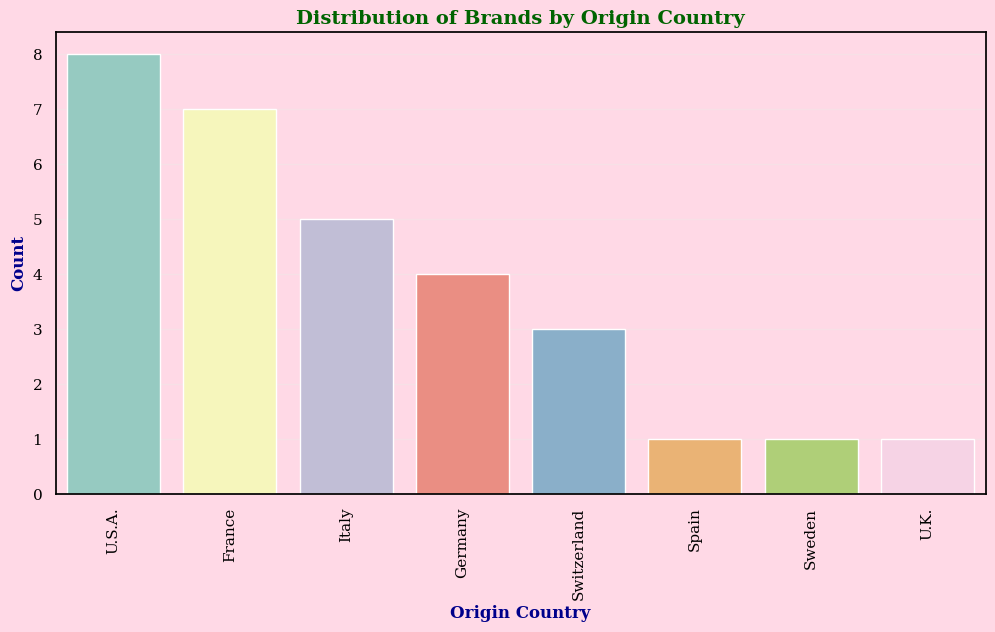

Count of Brands by Origin Country:
BrandOriginCountry
U.S.A.         8
France         7
Italy          5
Germany        4
Switzerland    3
Spain          1
Sweden         1
U.K.           1
Name: count, dtype: int64


In [22]:
# To show the distribution of brands by origin country
plt.figure(figsize=(12, 6))
sns.countplot(x="BrandOriginCountry", data=data, palette="Set3", order=data["BrandOriginCountry"].value_counts().index)
plt.title("Distribution of Brands by Origin Country", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel("Origin Country", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Count", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=90)
plt.savefig('Distribution of Brands by Origin Country.png')
plt.show()

# Print the count of brands by origin country
brand_count_by_country = data["BrandOriginCountry"].value_counts()
print("Count of Brands by Origin Country:")
print(brand_count_by_country)

# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Correlation Analysis</p></div>


#### 🔘 Investigate potential correlations between brand equity, growth rate, and brand ranking within sectors or subsectors.
#### 🔘 Calculate correlation coefficients and visualize correlations using heatmaps.

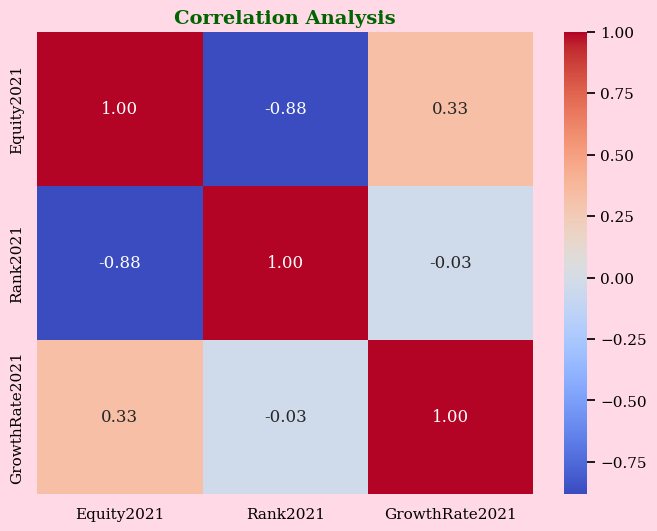

Correlation Matrix:
                Equity2021  Rank2021  GrowthRate2021
Equity2021        1.000000 -0.879685        0.330468
Rank2021         -0.879685  1.000000       -0.031997
GrowthRate2021    0.330468 -0.031997        1.000000


In [23]:
# Calculate correlation matrix
correlation_matrix = data[["Equity2021", "Rank2021", "GrowthRate2021"]].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Analysis", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.savefig('Correlation Analysis.png')
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Outlier Detection</p></div>


#### 🔘 Identify and investigate outliers in brand equity, growth rate, or ranking data.
#### 🔘 Determine if outliers are genuine or require further data validation.

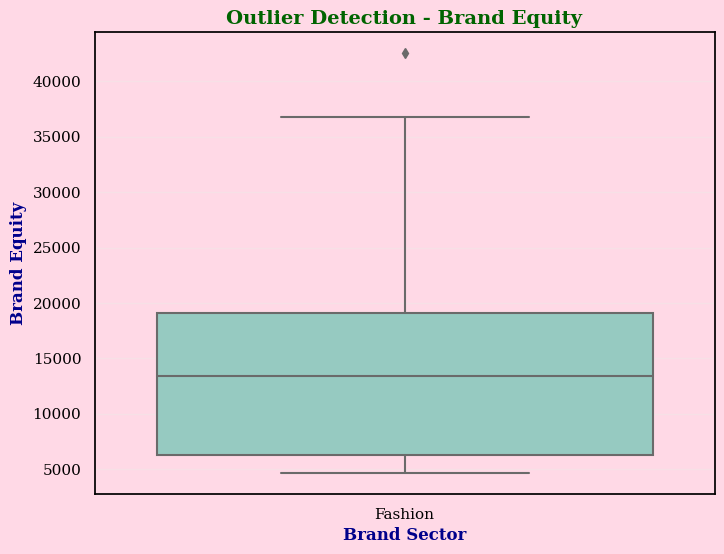

Outliers by Brand Sector:
Brand Sector: Fashion
   BrandName  Equity2021
22      Nike     42538.0



In [24]:
# Detect and visualize outliers in brand equity using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="BrandSector", y="Equity2021", data=data, palette="Set3")
plt.title("Outlier Detection - Brand Equity", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel("Brand Sector", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel("Brand Equity", fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Outlier Detection - Brand Equity.png')
plt.show()

# Detect and print outliers using quartiles
brand_sector_outliers = {}
for sector in data["BrandSector"].unique():
    sector_data = data[data["BrandSector"] == sector]
    q1 = sector_data["Equity2021"].quantile(0.25)
    q3 = sector_data["Equity2021"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = sector_data[(sector_data["Equity2021"] < lower_bound) | (sector_data["Equity2021"] > upper_bound)]
    brand_sector_outliers[sector] = outliers

print("Outliers by Brand Sector:")
for sector, outliers in brand_sector_outliers.items():
    print(f"Brand Sector: {sector}")
    print(outliers[["BrandName", "Equity2021"]])
    print()


# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:80%;letter-spacing:0.5px;margin:0"><b> </b>Time Series Analysis</p></div>


#### 🔘 Time series analysis to detect trends, seasonality, and anomalies.

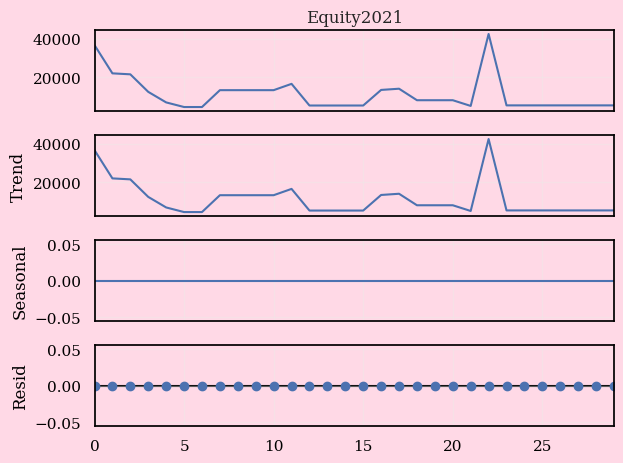

In [25]:
# Fill missing values in the "Equity2021" column with forward fill
data["Equity2021"].fillna(method='ffill', inplace=True)

# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Equity2021"], model="additive", period=1)
result.plot()
plt.show()


# <div style="color:darkgreen;display:inline-block;border-radius:5px;background-color:#FFD9E6;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkgreen;overflow:hidden;font-size:85%;letter-spacing:0.5px;margin:0"><b> </b>Machine Learning Predictions</p></div>



#### 🔘 Utilize machine learning algorithms for predictive modeling, such as predicting future brand rankings or growth rates based on historical data.

In [26]:
# Use machine learning algorithms (e.g., regression, classification) for predictions

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# Check for missing values (NaN) in the entire DataFrame
missing_data = data.isna().sum()

# Print the count of missing values for each column
print("Missing Data Analysis:")
print(missing_data)

Missing Data Analysis:
BrandName              0
BrandOriginCountry     0
BrandOriginRegion      0
BrandSector            0
BrandSubSector         0
                      ..
GrowthRate2017        16
GrowthRate2018        17
GrowthRate2019        16
GrowthRate2020        16
GrowthRate2021        16
Length: 68, dtype: int64


In [28]:
# Replacing NaN with zeros
data_filled = data.fillna(0)

data.isna().sum()

BrandName              0
BrandOriginCountry     0
BrandOriginRegion      0
BrandSector            0
BrandSubSector         0
                      ..
GrowthRate2017        16
GrowthRate2018        17
GrowthRate2019        16
GrowthRate2020        16
GrowthRate2021        16
Length: 68, dtype: int64

In [29]:
# Drop rows with NaN values in any column
data.dropna(inplace=True)

data.isna().sum()

BrandName             0.0
BrandOriginCountry    0.0
BrandOriginRegion     0.0
BrandSector           0.0
BrandSubSector        0.0
                     ... 
GrowthRate2017        0.0
GrowthRate2018        0.0
GrowthRate2019        0.0
GrowthRate2020        0.0
GrowthRate2021        0.0
Length: 68, dtype: float64

In [30]:
# Use machine learning algorithms (e.g., regression, classification) for predictions

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
# Check for and handle missing values
data.dropna(subset=["Rank2021", "GrowthRate2021", "Equity2021"], inplace=True)

In [32]:
# Check if there are any data samples left
if data.shape[0] > 0:
    # Split the data into features (X) and target (y)
    X = data[["Rank2021", "GrowthRate2021"]]
    y = data["Equity2021"]

    # Create and fit the Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict on the same dataset (not recommended for evaluation)
    y_pred = model.predict(X)

    # Evaluate the model (not recommended without a separate test set)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    # Print the evaluation metrics
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
else:
    print("No data samples left after handling missing values.")

No data samples left after handling missing values.


##### "No data samples left after handling missing values," suggests that there were no valid data samples remaining in the dataset after handling missing values. This could mean that the dataset had missing values in such a way that all rows were removed during data preprocessing, leaving no data for training and evaluation. It's essential to investigate and handle missing values appropriately to ensure meaningful model training and evaluation.

<div class="alert alert-block alert-info"> 📌 "Hey there! Your positive feedback and support for my notebook mean the world to me! It motivates me to create more valuable content. If you can spare a moment to give it an upvote, it would help others discover and benefit from it too. Together, let's foster a vibrant community of knowledge-sharing and empowerment. Thank you for considering it, and continued success on your learning journey!"😊